In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [27]:
# Carregando os conjuntos de dados do diretório do e-commerce em variáveis individuais para facilitar a manipulação.

diretorio_ecommerce = 'brazilian_ecommerce/'
df_item = pd.read_csv(diretorio_ecommerce + "olist_order_items_dataset.csv")
df_reviews = pd.read_csv(diretorio_ecommerce + "olist_order_reviews_dataset.csv")
df_orders = pd.read_csv(diretorio_ecommerce + "olist_orders_dataset.csv")
df_products = pd.read_csv(diretorio_ecommerce + "olist_products_dataset.csv")
df_geolocation = pd.read_csv(diretorio_ecommerce + "olist_geolocation_dataset.csv")
df_sellers = pd.read_csv(diretorio_ecommerce + "olist_sellers_dataset.csv")
df_order_pay = pd.read_csv(diretorio_ecommerce + "olist_order_payments_dataset.csv")
df_customers = pd.read_csv(diretorio_ecommerce + "olist_customers_dataset.csv")
df_category = pd.read_csv(diretorio_ecommerce + "product_category_name_translation.csv")

# Nova seção

In [28]:
# Lista de DataFrames, cada um representando um conjunto de dados específico
datasets = [df_customers, df_geolocation, df_orders, df_item, df_order_pay,
            df_reviews, df_products, df_sellers]

# Nomes associados a cada DataFrame para identificação
names = ['df_customer', 'df_geolocation', 'df_orders', 'df_item', 'df_order_pay',
         'df_reviews', 'df_products', 'df_sellers']

# Lista vazia para armazenar informações sobre os conjuntos de dados
data_info = []


# Iteração pelos DataFrames e seus respectivos nomes para coletar informações
for name, df in zip(names, datasets):
    # Coleta de informações sobre cada DataFrame
    info = {
        'conjunto_de_dados': name,
        'n_linhas': df.shape[0],  # Número de linhas no DataFrame
        'n_colunas': df.shape[1],  # Número de colunas no DataFrame
        'quantidade_de_nulos': df.isnull().sum().sum(),  # Quantidade total de valores nulos
        'quantidade_de_colunas_com_nulos': len([col for col, null in df.isnull().sum().items() if null > 0]),  # Número de colunas com valores nulos
        'percentual_de_nulos': df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100,  # Percentual de valores nulos no DataFrame
        'colunas_com_nulos': ', '.join([col for col, null in df.isnull().sum().items() if null > 0])  # Nomes das colunas com valores nulos
    }
    data_info.append(info)  # Adiciona as informações do DataFrame à lista de informações

data_info = pd.DataFrame(data_info)  # Converte a lista de informações em um DataFrame
data_info.style.background_gradient()  # Aplica um estilo visual ao DataFrame para melhorar a visualização


,conjunto_de_dados,n_linhas,n_colunas,quantidade_de_nulos,quantidade_de_colunas_com_nulos,percentual_de_nulos,colunas_com_nulos
0,df_customer,99441,5,0,0,0.000000,
1,df_geolocation,1000163,5,0,0,0.000000,
2,df_orders,99441,8,4908,3,0.616949,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
3,df_item,112650,7,0,0,0.000000,
4,df_order_pay,103886,5,0,0,0.000000,
5,df_reviews,99224,7,145903,2,21.006295,"review_comment_title, review_comment_message"
6,df_products,32951,9,2448,8,0.825468,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,df_sellers,3095,4,0,0,0.000000,


In [29]:
#verificação de onde estão os nulos
nulos_orders = (df_orders.isnull().mean() * 100).round(2).sort_values(ascending=False)
print(nulos_orders)

order_delivered_customer_date    2.98
order_delivered_carrier_date     1.79
order_approved_at                0.16
order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_estimated_delivery_date    0.00
dtype: float64


In [30]:
#remoção dos nulos
df_orders = df_orders.dropna()
df_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [31]:
#verificação de onde ta os nulos
nulos_products = (df_products.isnull().mean() * 100).round(2).sort_values(ascending=False)
print(nulos_products)

product_category_name         1.85
product_name_lenght           1.85
product_description_lenght    1.85
product_photos_qty            1.85
product_weight_g              0.01
product_length_cm             0.01
product_height_cm             0.01
product_width_cm              0.01
product_id                    0.00
dtype: float64


In [32]:
#remoção dos nulos
df_products = df_products.dropna()
df_products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [33]:
#verificação de onde ta os nulos
nulos_reviews = (df_reviews.isnull().mean() * 100).round(2).sort_values(ascending=False)
print(nulos_reviews)

review_comment_title       88.34
review_comment_message     58.70
review_id                   0.00
order_id                    0.00
review_score                0.00
review_creation_date        0.00
review_answer_timestamp     0.00
dtype: float64


In [34]:
#remoção dos nulos, retirando as colunas
df_reviews = df_reviews.drop('review_comment_title', axis=1)
df_reviews = df_reviews.drop('review_comment_message', axis=1)

In [35]:
#verificação se deu certo
df_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [36]:
data_tipo = []

# Iterando pelos DataFrames e coletando informações sobre as colunas e tipos de dados
for name, df in zip(names, datasets):
    for column, data_type in zip(df.columns, df.dtypes):
        info = {
            'conjunto_de_dados': name,
            'nome_da_coluna': column,
            'tipo_dos_dados': data_type
        }
        data_tipo.append(info)

# Criando o DataFrame com as informações coletadas
data_tipo = pd.DataFrame(data_tipo)

# Exibindo o DataFrame com informações sobre colunas e tipos de dados
display(data_tipo)

,conjunto_de_dados,nome_da_coluna,tipo_dos_dados
0,df_customer,customer_id,object
1,df_customer,customer_unique_id,object
2,df_customer,customer_zip_code_prefix,int64
3,df_customer,customer_city,object
4,df_customer,customer_state,object
5,df_geolocation,geolocation_zip_code_prefix,int64
6,df_geolocation,geolocation_lat,float64
7,df_geolocation,geolocation_lng,float64
8,df_geolocation,geolocation_city,object
9,df_geolocation,geolocation_state,object


In [37]:
coluna_datas = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                'order_estimated_delivery_date', 'order_delivered_customer_date']

print(df_orders[coluna_datas].dtypes)

# Aplicar a conversão para datetime
for colunas in coluna_datas:
    df_orders[colunas] = pd.to_datetime(df_orders[colunas])

df_item['shipping_limit_date'] = pd.to_datetime(df_item['shipping_limit_date'])


# Após a conversão
print(df_orders[coluna_datas].dtypes)



order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_estimated_delivery_date    object
order_delivered_customer_date    object
dtype: object


C:\Users\Vini\AppData\Local\Temp\ipykernel_10660\3352526197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders[colunas] = pd.to_datetime(df_orders[colunas])
C:\Users\Vini\AppData\Local\Temp\ipykernel_10660\3352526197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders[colunas] = pd.to_datetime(df_orders[colunas])
C:\Users\Vini\AppData\Local\Temp\ipykernel_10660\3352526197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_delivered_customer_date    datetime64[ns]
dtype: object


C:\Users\Vini\AppData\Local\Temp\ipykernel_10660\3352526197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders[colunas] = pd.to_datetime(df_orders[colunas])


In [38]:

# Atributos da data da compra - Ano e Mês
df_orders['ano_da_compra'] = df_orders['order_purchase_timestamp'].dt.year
df_orders['mes_da_compra'] = df_orders['order_purchase_timestamp'].dt.month
df_orders['nome_mes_da_compra'] = df_orders['order_purchase_timestamp'].dt.strftime('%b')
df_orders['ano_e_mes_da_compra'] = df_orders['order_purchase_timestamp'].dt.strftime('%Y%m')
df_orders['data_da_compra'] = df_orders['order_purchase_timestamp'].dt.strftime('%Y%m%d')

# Atributos da data da compra - Dia e Dia da Semana
df_orders['dia_da_compra'] = df_orders['order_purchase_timestamp'].dt.day
df_orders['dia_da_semana_compra'] = df_orders['order_purchase_timestamp'].dt.dayofweek
df_orders['nome_dia_compra'] = df_orders['order_purchase_timestamp'].dt.strftime('%a')

# Atributos da data da compra - Hora e Período do Dia
df_orders['hora_da_compra'] = df_orders['order_purchase_timestamp'].dt.hour
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Madrugada', 'Manhã', 'Tarde', 'Noite']
df_orders['periodo_da_compra'] = pd.cut(df_orders['hora_da_compra'], hours_bins, labels=hours_labels)

# Visualizar o novo DataFrame após as transformações
df_orders.head()



C:\Users\Vini\AppData\Local\Temp\ipykernel_10660\1477464288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['ano_da_compra'] = df_orders['order_purchase_timestamp'].dt.year
C:\Users\Vini\AppData\Local\Temp\ipykernel_10660\1477464288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['mes_da_compra'] = df_orders['order_purchase_timestamp'].dt.month
C:\Users\Vini\AppData\Local\Temp\ipykernel_10660\1477464288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ano_da_compra,mes_da_compra,nome_mes_da_compra,ano_e_mes_da_compra,data_da_compra,dia_da_compra,dia_da_semana_compra,nome_dia_compra,hora_da_compra,periodo_da_compra
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,201710,20171002,2,0,Mon,10,Manhã
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,201807,20180724,24,1,Tue,20,Noite
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,201808,20180808,8,2,Wed,8,Manhã
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,201711,20171118,18,5,Sat,19,Noite
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,201802,20180213,13,1,Tue,21,Noite


In [39]:
df_category['product_category_name'].unique()

array(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'm

In [40]:
# Agrupando as categorias
categoria_ampla = {
'Saude e Beleza': ['beleza_saude', 'perfumaria', 'bebes', 'cuidados_pessoais', 'fraldas_higiene'],
'Tecnologia': ['informatica_acessorios', 'tablets_impressao_imagem', 'telefonia', 'telefonia_fixa', 'consoles_games', 'audio', 'pcs', 'eletronicos', 'eletrodomesticos','eletrodomesticos_2','eletroportateis'],
'Casa e Decoração': ['cama_mesa_banho', 'moveis_decoracao', 'utilidades_domesticas', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'moveis_escritorio','moveis_colchao_e_estofado', 'moveis_sala', 'moveis_quarto', 'moveis_externos', 'portateis_casa_forno_e_cafe', 'casa_conforto_2', 'casa_conforto', 'climatizacao'],
'Automotivo': ['automotivo'],
'Lazer e Entretenimento': ['esporte_lazer', 'brinquedos', 'instrumentos_musicais', 'cds_dvds_musicais', 'dvds_blu_ray', 'musica', 'artes_e_artesanato', 'artes'],
'Moda': ['fashion_bolsas_e_acessorios', 'fashion_calcados', 'fashion_roupa_masculina', 'fashion_roupa_feminina', 'fashion_underwear_e_moda_praia', 'Fashion_esporte','fashion_roupa_infanto_juvenil'],
'Culinaria': ['alimentos', 'la_cuisine', 'bebidas', 'flores', 'alimentos_bebidas'],
'Construção e Jardim': ['ferramentas_jardim', 'construcao_ferramentas_construcao', 'construcao_ferramentas_jardim', 'construcao_ferramentas_iluminacao','Construcao_ferramentas_ferramentas', 'construcao_ferramentas_seguranca', 'casa_construcao'],
'Livros e Cultura': ['papelaria', 'livros_tecnicos', 'livros_interesse_geral', 'livros_importados'],
'Eventos e Festas': ['relogios_presentes', 'artigos_de_festas', 'artigos_de_natal'],
'Negócio e Servicos': ['market_place', 'industria_comercio_e_negocios', 'agro_industria_e_comercio', 'seguros_e_servicos', 'cine_foto'],
'Sinalização e Segurança': ['sinalizacao_e_seguranca'],
'Petshop': ['pet_shop'],
'Produtos Diversos': ['cool_stuff']
}


# Agrupando as categorias no DataFrame
df_orders['categoria_ampla'] = df_products['product_category_name'].apply(lambda x: next((key for key, value in categoria_ampla.items() if x in value), 'Outros'))

C:\Users\Vini\AppData\Local\Temp\ipykernel_10660\3317279083.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['categoria_ampla'] = df_products['product_category_name'].apply(lambda x: next((key for key, value in categoria_ampla.items() if x in value), 'Outros'))


In [41]:
dados_agrupados = pd.merge(df_orders, df_item, on='order_id', how='left')
dados_agrupados = pd.merge(dados_agrupados, df_products, on='product_id', how='left')
dados_agrupados = pd.merge(dados_agrupados, df_customers, on='customer_id', how='left')
dados_agrupados = pd.merge(dados_agrupados, df_reviews, on='order_id', how='left')


dados_agrupados.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ano_da_compra,mes_da_compra,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,...,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,...,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,...,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,...,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-17 00:00:00,2018-02-18 13:02:51


In [42]:
import datetime
# Atributos da data da compra - Ano e Mês
df_orders['ano_da_compra'] = df_orders['order_purchase_timestamp'].dt.year
df_orders['mes_da_compra'] = df_orders['order_purchase_timestamp'].dt.month
df_orders['nome_mes_da_compra'] = df_orders['order_purchase_timestamp'].dt.strftime('%b')
df_orders['ano_e_mes_da_compra'] = df_orders['order_purchase_timestamp'].dt.strftime('%Y%m')
df_orders['data_da_compra'] = df_orders['order_purchase_timestamp'].dt.strftime('%Y%m%d')

# Atributos da data da compra - Dia e Dia da Semana
df_orders['dia_da_compra'] = df_orders['order_purchase_timestamp'].dt.day
df_orders['dia_da_semana_compra'] = df_orders['order_purchase_timestamp'].dt.dayofweek
df_orders['nome_dia_compra'] = df_orders['order_purchase_timestamp'].dt.strftime('%a')

# Atributos da data da compra - Hora e Período do Dia
df_orders['hora_da_compra'] = df_orders['order_purchase_timestamp'].dt.hour
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Madrugada', 'Manhã', 'Tarde', 'Noite']
df_orders['periodo_da_compra'] = pd.cut(df_orders['hora_da_compra'], hours_bins, labels=hours_labels)

# Visualizar o novo DataFrame após as transformações
df_orders.head()

C:\Users\Vini\AppData\Local\Temp\ipykernel_10660\2466189701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['ano_da_compra'] = df_orders['order_purchase_timestamp'].dt.year
C:\Users\Vini\AppData\Local\Temp\ipykernel_10660\2466189701.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['mes_da_compra'] = df_orders['order_purchase_timestamp'].dt.month
C:\Users\Vini\AppData\Local\Temp\ipykernel_10660\2466189701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ano_da_compra,mes_da_compra,nome_mes_da_compra,ano_e_mes_da_compra,data_da_compra,dia_da_compra,dia_da_semana_compra,nome_dia_compra,hora_da_compra,periodo_da_compra,categoria_ampla
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,201710,20171002,2,0,Mon,10,Manhã,Saude e Beleza
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,201807,20180724,24,1,Tue,20,Noite,Lazer e Entretenimento
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,201808,20180808,8,2,Wed,8,Manhã,Lazer e Entretenimento
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,201711,20171118,18,5,Sat,19,Noite,Saude e Beleza
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,201802,20180213,13,1,Tue,21,Noite,Casa e Decoração


In [43]:
# Agrupando as categorias
categoria_ampla = {
'Saude e Beleza': ['beleza_saude', 'perfumaria', 'bebes', 'cuidados_pessoais', 'fraldas_higiene'],
'Tecnologia': ['informatica_acessorios', 'tablets_impressao_imagem', 'telefonia', 'telefonia_fixa', 'consoles_games', 'audio', 'pcs', 'eletronicos', 'eletrodomesticos','eletrodomesticos_2','eletroportateis'],
'Casa e Decoração': ['cama_mesa_banho', 'moveis_decoracao', 'utilidades_domesticas', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'moveis_escritorio','moveis_colchao_e_estofado', 'moveis_sala', 'moveis_quarto', 'moveis_externos', 'portateis_casa_forno_e_cafe', 'casa_conforto_2', 'casa_conforto', 'climatizacao'],
'Automotivo': ['automotivo'],
'Lazer e Entretenimento': ['esporte_lazer', 'brinquedos', 'instrumentos_musicais', 'cds_dvds_musicais', 'dvds_blu_ray', 'musica', 'artes_e_artesanato', 'artes'],
'Moda': ['fashion_bolsas_e_acessorios', 'fashion_calcados', 'fashion_roupa_masculina', 'fashion_roupa_feminina', 'fashion_underwear_e_moda_praia', 'Fashion_esporte','fashion_roupa_infanto_juvenil'],
'Culinaria': ['alimentos', 'la_cuisine', 'bebidas', 'flores', 'alimentos_bebidas'],
'Construção e Jardim': ['ferramentas_jardim', 'construcao_ferramentas_construcao', 'construcao_ferramentas_jardim', 'construcao_ferramentas_iluminacao','Construcao_ferramentas_ferramentas', 'construcao_ferramentas_seguranca', 'casa_construcao'],
'Livros e Cultura': ['papelaria', 'livros_tecnicos', 'livros_interesse_geral', 'livros_importados'],
'Eventos e Festas': ['relogios_presentes', 'artigos_de_festas', 'artigos_de_natal'],
'Negócio e Servicos': ['market_place', 'industria_comercio_e_negocios', 'agro_industria_e_comercio', 'seguros_e_servicos', 'cine_foto'],
'Sinalização e Segurança': ['sinalizacao_e_seguranca'],
'Petshop': ['pet_shop'],
'Produtos Diversos': ['cool_stuff']
}


In [44]:
# Esse código traz o id dos 10 produtos mais vendidos, suas respectivas quantidades e categorias
# Vale ressaltar que, para fins de organização, substituímos a coluna product_category_name pelo novo agrupamento de dados denominado categoria_ampla

# Combina as tabelas df_order e df_item com base na coluna order_id
merged_table = df_orders.merge(df_item, on='order_id')

# Converte as colunas 'product_id' para o tipo de dado 'object'
merged_table['product_id'] = merged_table['product_id'].astype('object')
df_products['product_id'] = df_products['product_id'].astype('object')

# Encontra os produtos mais vendidos
produtos_mais_vendidos = merged_table['product_id'].value_counts().head(10)

# Cria um DataFrame com 'product_id' e 'count'
produtos_mais_vendidos_df = pd.DataFrame({'product_id': produtos_mais_vendidos.index, 'count': produtos_mais_vendidos.values})

# Junção (merge) para obter 'categoria_ampla' para os produtos mais vendidos
totais_mais_vendidos = pd.merge(produtos_mais_vendidos_df, df_products[['product_id', 'product_category_name']], on='product_id')

# Adiciona a coluna categoria_ampla
totais_mais_vendidos['categoria_ampla'] = totais_mais_vendidos['product_category_name'].apply(lambda x: next((key for key, value in categoria_ampla.items() if x in value), 'Outros'))

# Remove a coluna 'product_category_name' e ordena os totais da contagem do maior para o menor
totais_mais_vendidos = totais_mais_vendidos.drop('product_category_name', axis=1).sort_values(by='count', ascending=False)

print(totais_mais_vendidos)

                         product_id  count      categoria_ampla
0  aca2eb7d00ea1a7b8ebd4e68314663af    520     Casa e Decoração
1  422879e10f46682990de24d770e7f83d    484  Construção e Jardim
2  99a4788cb24856965c36a24e339b6058    477     Casa e Decoração
3  389d119b48cf3043d311335e499d9c6b    390  Construção e Jardim
4  368c6c730842d78016ad823897a372db    388  Construção e Jardim
5  53759a2ecddad2bb87a079a1f1519f73    373  Construção e Jardim
6  d1c427060a0f73f6b889a5c7c61f2ac4    332           Tecnologia
7  53b36df67ebb7c41585e8d54d6772e08    321     Eventos e Festas
8  154e7e31ebfa092203795c972e5804a6    274       Saude e Beleza
9  3dd2a17168ec895c781a9191c1e95ad7    272           Tecnologia


C:\Users\Vini\AppData\Local\Temp\ipykernel_10660\2710999228.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products['product_id'] = df_products['product_id'].astype('object')


C:\Users\Vini\AppData\Local\Temp\ipykernel_10660\2661465441.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=contagem_categorias.values, y=contagem_categorias.index, palette='Set2')


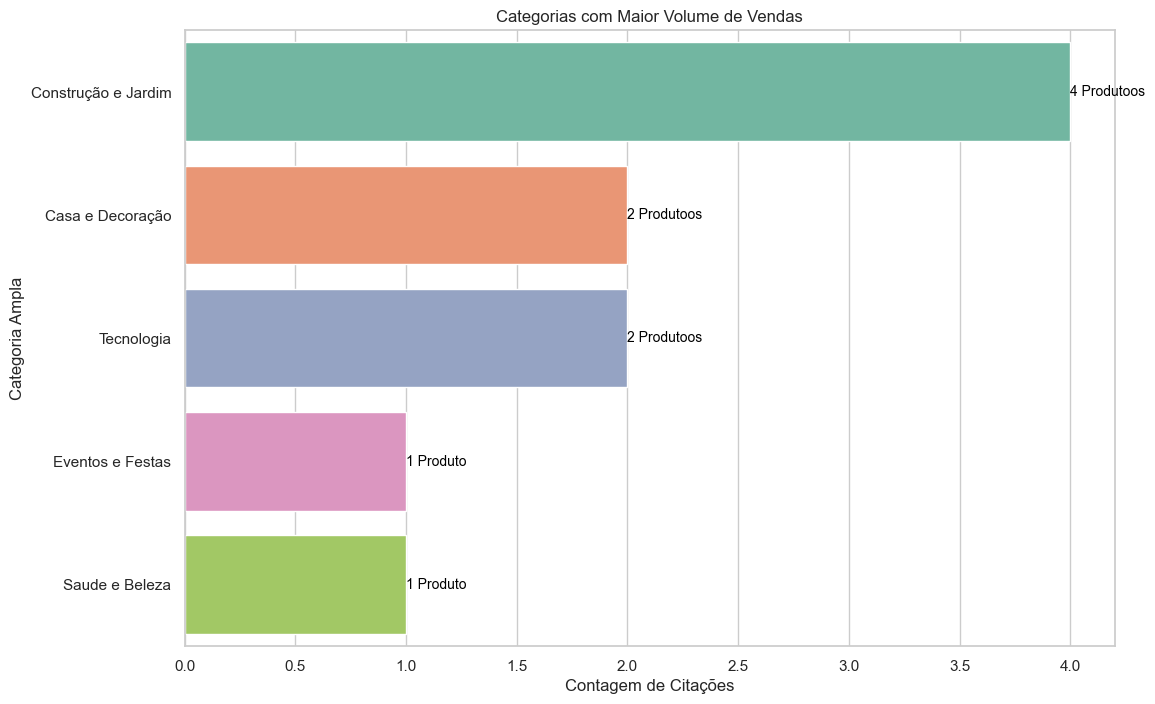

In [45]:
# Representação visual dos dados acima (gráfico de barras)

# Defina o estilo do gráfico
sns.set(style="whitegrid")

# Crie uma figura e eixos
plt.figure(figsize=(12, 8))

# Contagem de quantas vezes cada categoria_ampla foi citada
contagem_categorias = totais_mais_vendidos['categoria_ampla'].value_counts()

# Plote o gráfico de barras horizontais com uma paleta de cores mais alegre
ax = sns.barplot(x=contagem_categorias.values, y=contagem_categorias.index, palette='Set2')

# Adicione anotações para indicar o número de vezes que cada categoria_ampla foi citada
for index, value in enumerate(contagem_categorias.values):
    ax.text(value, index, f'{value} Produto{"os" if value > 1 else ""}', va='center', fontsize=10, color='black')

# Adicione rótulos e título
plt.xlabel('Contagem de Citações')
plt.ylabel('Categoria Ampla')
plt.title('Categorias com Maior Volume de Vendas')

# Exiba o gráfico
plt.show()

C:\Users\Vini\AppData\Local\Temp\ipykernel_10660\3317158982.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='count', y='seller_id', data=contagem_vendas.head(10), palette='viridis')


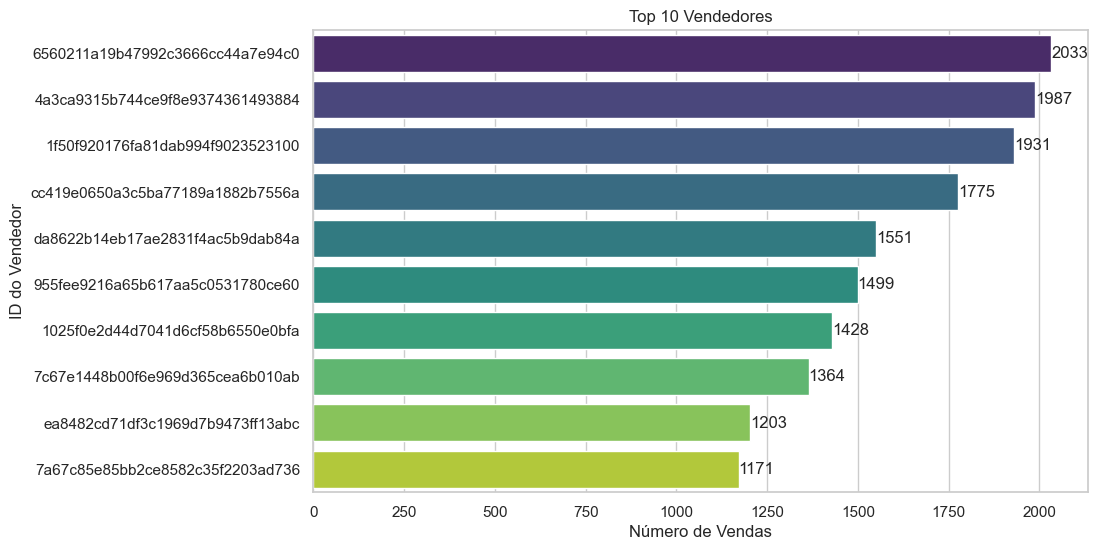

In [46]:
# # Esse código traz o id dos 10 melhores vendedores e seus respectivos totais de vendas

# Agrupando os dados dos Dataframes df_seller e df_item com base na coluna seller_id
dados_vendas = pd.merge(df_sellers, df_item, on='seller_id', how='left')

# Calcula o número de vendas por vendedor
contagem_vendas = dados_vendas['seller_id'].value_counts().reset_index()
contagem_vendas.columns = ['seller_id', 'count']

# Ordena o DataFrame pelos totais de vendas em ordem decrescente
contagem_vendas = contagem_vendas.sort_values(by='count', ascending=False)

# Cria um gráfico de barras com base no número de vendas
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='count', y='seller_id', data=contagem_vendas.head(10), palette='viridis')

# Adiciona rótulos e título
plt.xlabel('Número de Vendas')
plt.ylabel('ID do Vendedor')
plt.title('Top 10 Vendedores')

# Adiciona as contagens acima das barras
for index, value in enumerate(contagem_vendas['count'].head(10)):
    bar_plot.text(value, index, str(value), ha='left', va='center')

# Mostra o gráfico
plt.show()

In [47]:
# Complemento dos dados acima, com o acréscimo da cidade do vendedor

dados_vendas = pd.merge(df_sellers, df_item, on='seller_id', how='left')

# Calcula o número de vendas por vendedor
contagem_vendas = dados_vendas['seller_id'].value_counts().reset_index()
contagem_vendas.columns = ['seller_id', 'count']

# Ordena o DataFrame pelos totais de vendas em ordem decrescente
contagem_vendas = contagem_vendas.sort_values(by='count', ascending=False)

# Seleciona os top 10 vendedores
top_10_vendedores = contagem_vendas.head(10)

# Agrupando as informações de dados_vendas e de df_sellers para os top 10 vendedores
tabelas_combinadas = pd.merge(top_10_vendedores, df_sellers, on='seller_id', how='left')

# Seleciona as colunas desejadas
tabelas_combinadas = tabelas_combinadas[['seller_id', 'count', 'seller_city']]

print(tabelas_combinadas)

                          seller_id  count            seller_city
0  6560211a19b47992c3666cc44a7e94c0   2033              sao paulo
1  4a3ca9315b744ce9f8e9374361493884   1987               ibitinga
2  1f50f920176fa81dab994f9023523100   1931  sao jose do rio preto
3  cc419e0650a3c5ba77189a1882b7556a   1775            santo andre
4  da8622b14eb17ae2831f4ac5b9dab84a   1551             piracicaba
5  955fee9216a65b617aa5c0531780ce60   1499              sao paulo
6  1025f0e2d44d7041d6cf58b6550e0bfa   1428              sao paulo
7  7c67e1448b00f6e969d365cea6b010ab   1364        itaquaquecetuba
8  ea8482cd71df3c1969d7b9473ff13abc   1203              sao paulo
9  7a67c85e85bb2ce8582c35f2203ad736   1171              sao paulo


In [48]:
# Esse código complementa os dados acima, trazendo a cidade de cada vendedor

# Encontra os vendedores com mais vendas
top_10_vendedores = tabelas_combinadas['seller_id'].value_counts().head(10)

# Cria um DataFrame com 'seller_id' e 'count'
top_10_vendedores_df = pd.DataFrame({'seller_id': top_10_vendedores.index, 'count': top_10_vendedores.values})

# Merge para adicionar a coluna 'seller_city' à base top_10_vendedores_df
top_10_vendedores_df = pd.merge(top_10_vendedores_df, df_sellers[['seller_id', 'seller_city']], on='seller_id', how='left', suffixes=('_top_10_vendedores', '_df_sellers'))

# Se houver vendedores não encontrados, preencha 'Não encontrado' nas linhas correspondentes
top_10_vendedores_df['seller_city'].fillna('Não encontrado', inplace=True)

print(top_10_vendedores_df)

                          seller_id  count            seller_city
0  6560211a19b47992c3666cc44a7e94c0      1              sao paulo
1  4a3ca9315b744ce9f8e9374361493884      1               ibitinga
2  1f50f920176fa81dab994f9023523100      1  sao jose do rio preto
3  cc419e0650a3c5ba77189a1882b7556a      1            santo andre
4  da8622b14eb17ae2831f4ac5b9dab84a      1             piracicaba
5  955fee9216a65b617aa5c0531780ce60      1              sao paulo
6  1025f0e2d44d7041d6cf58b6550e0bfa      1              sao paulo
7  7c67e1448b00f6e969d365cea6b010ab      1        itaquaquecetuba
8  ea8482cd71df3c1969d7b9473ff13abc      1              sao paulo
9  7a67c85e85bb2ce8582c35f2203ad736      1              sao paulo


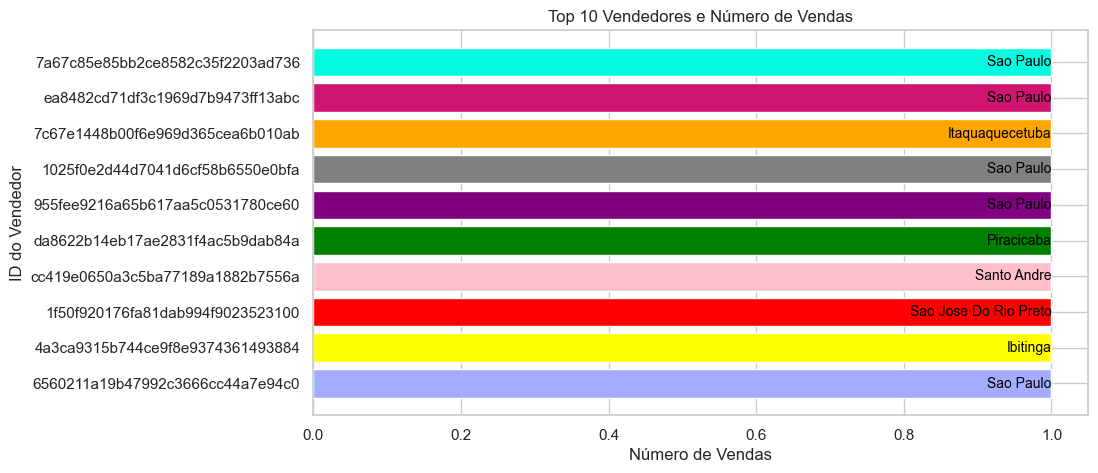

In [49]:
# Plota um gráfico de barras horizontais
plt.figure(figsize=(10, 5))
colors = ['#a3acff', 'yellow', 'red', 'pink', 'green', 'purple', 'gray', 'orange', '#cf156f', '#03fcdf']
bars = plt.barh(top_10_vendedores_df['seller_id'], top_10_vendedores_df['count'], color=colors)

# Adiciona a informação da cidade do vendedor nas barras
for bar, city in zip(bars, top_10_vendedores_df['seller_city']):
    formatted_city = city.title()  # Capitaliza a primeira letra de cada palavra
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, formatted_city, ha='right', va='center', color='black', fontsize=10)

plt.xlabel('Número de Vendas')
plt.ylabel('ID do Vendedor')
plt.title('Top 10 Vendedores e Número de Vendas')

# Exibe o gráfico
plt.show()

In [50]:
# Reagrupamento por cidade dos  totais de vendas dos 10 melhores vendedores

# Encontra os vendedores com mais vendas
top_10_vendedores = tabelas_combinadas['seller_id'].value_counts().head(10)

# Cria um DataFrame com 'seller_id' e 'count'
top_10_vendedores_df = pd.DataFrame({'seller_id': top_10_vendedores.index, 'count': top_10_vendedores.values})

# Merge para adicionar a coluna 'seller_city' à base top_10_vendedores_df
top_10_vendedores_df = pd.merge(top_10_vendedores_df, df_sellers[['seller_id', 'seller_city']], on='seller_id', how='left', suffixes=('_top_10_vendedores', '_df_sellers'))

# Se houver vendedores não encontrados, preencha 'Não encontrado' nas linhas correspondentes
top_10_vendedores_df['seller_city'].fillna('Não encontrado', inplace=True)

# Agrupa o DataFrame baseado na condição de que a 'seller_city' seja 'São Paulo'
agrupamento_df = top_10_vendedores_df.groupby('seller_city')['count'].sum().reset_index()

# Ordena o DataFrame com base na coluna 'count' em ordem decrescente
agrupamento_df = agrupamento_df.sort_values(by='count', ascending=False)

# Converte a coluna 'seller_city' para tipo categórico com a ordem desejada
ordem_cidades = ['sao paulo', 'ibitinga', 'sao jose do rio preto', 'santo andre', 'piracicaba', 'itaquaquecetuba']
agrupamento_df['seller_city'] = agrupamento_df['seller_city'].astype(pd.CategoricalDtype(categories=ordem_cidades, ordered=True))

# Ordena o DataFrame com base na nova ordem da coluna 'seller_city'
agrupamento_df = agrupamento_df.sort_values(by='seller_city')

print(agrupamento_df)



             seller_city  count
5              sao paulo      5
0               ibitinga      1
4  sao jose do rio preto      1
3            santo andre      1
2             piracicaba      1
1        itaquaquecetuba      1


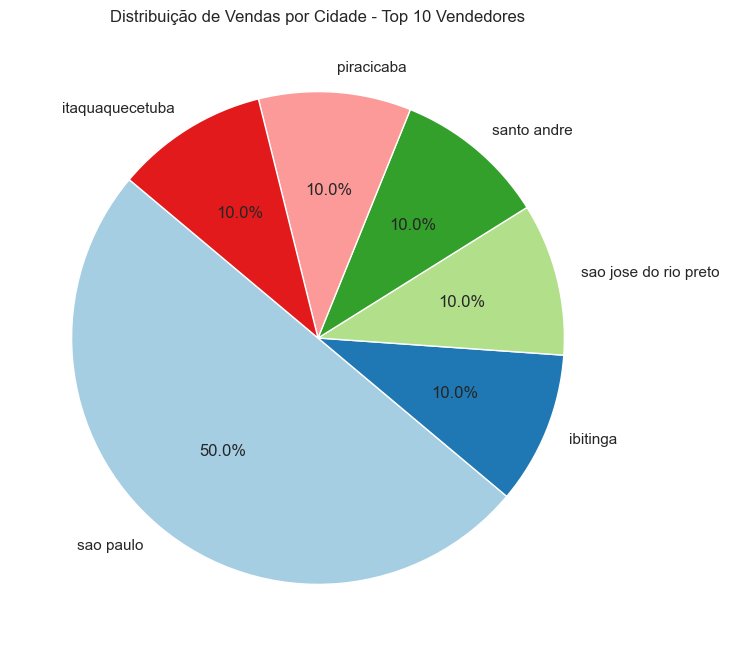

In [51]:
# Ordena o DataFrame com base na coluna 'count' em ordem decrescente
agrupamento_df = agrupamento_df.sort_values(by='count', ascending=False)

# Cria um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(agrupamento_df['count'], labels=agrupamento_df['seller_city'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Cidade - Top 10 Vendedores')
plt.show()

In [53]:
# Esse código traz a sazonalidade de compra por categoria ampla

#combinando as tabelas df_orders, df_item e df_products
categorias_vendas_compilado = pd.merge(pd.merge(df_item, df_orders[['order_id', 'order_delivered_customer_date']], on='order_id'), df_products[['product_id', 'product_category_name']], on='product_id')

#fazendo a conversão do formato das datas
categorias_vendas_compilado['order_delivered_customer_date'] = pd.to_datetime(categorias_vendas_compilado['order_delivered_customer_date'])

#fazendo o levantamento dos dados das vendas pelo order_delivered_customer_date
categorias_vendas_compilado['year'] = categorias_vendas_compilado['order_delivered_customer_date'].dt.year
categorias_vendas_compilado['month'] = categorias_vendas_compilado['order_delivered_customer_date'].dt.month

#agrupando os dados por ano, mês, e product_category_name
sazonalidade = categorias_vendas_compilado.groupby(['year', 'month', 'product_category_name']).size().reset_index(name='count')

# Adicione a coluna categoria_ampla a sazonalidade
sazonalidade['categoria_ampla'] = sazonalidade['product_category_name'].apply(lambda x: next((key for key, value in categoria_ampla.items() if x in value), 'Outros'))

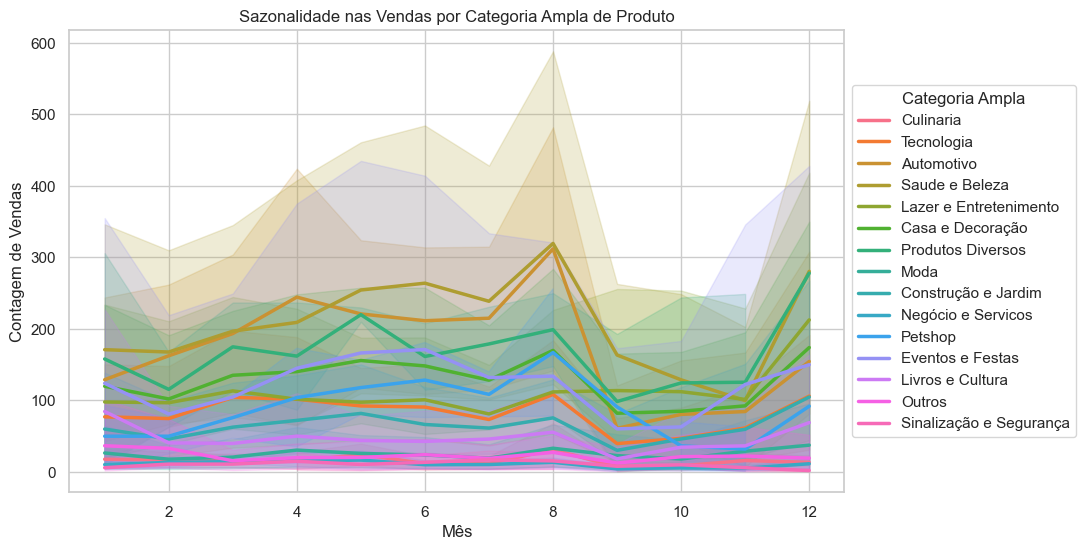

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajuste a figura para acomodar a legenda à direita do gráfico
plt.figure(figsize=(10, 6))

# Plote o gráfico de linha com linhas mais visíveis
sns.lineplot(x='month', y='count', hue='categoria_ampla', data=sazonalidade, linewidth=2.5)

# Adicione a legenda à direita do gráfico
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Categoria Ampla')

plt.title('Sazonalidade nas Vendas por Categoria Ampla de Produto')
plt.xlabel('Mês')
plt.ylabel('Contagem de Vendas')
plt.show()

In [55]:
#fazendo a conversão do formato das datas
categorias_vendas_compilado['order_delivered_customer_date'] = pd.to_datetime(categorias_vendas_compilado['order_delivered_customer_date'])

In [56]:
#fazendo o levantamento dos dados das vendas pelo order_delivered_customer_date
categorias_vendas_compilado['year'] = categorias_vendas_compilado['order_delivered_customer_date'].dt.year
categorias_vendas_compilado['month'] = categorias_vendas_compilado['order_delivered_customer_date'].dt.month

In [57]:
#agrupando os dados por ano, mês, e product_category_name
sazonalidade = categorias_vendas_compilado.groupby(['year', 'month', 'product_category_name']).size().reset_index(name='count')
# Adicione a coluna categoria_ampla a sazonalidade
sazonalidade['categoria_ampla'] = sazonalidade['product_category_name'].apply(lambda x: next((key for key, value in categoria_ampla.items() if x in value), 'Outros'))


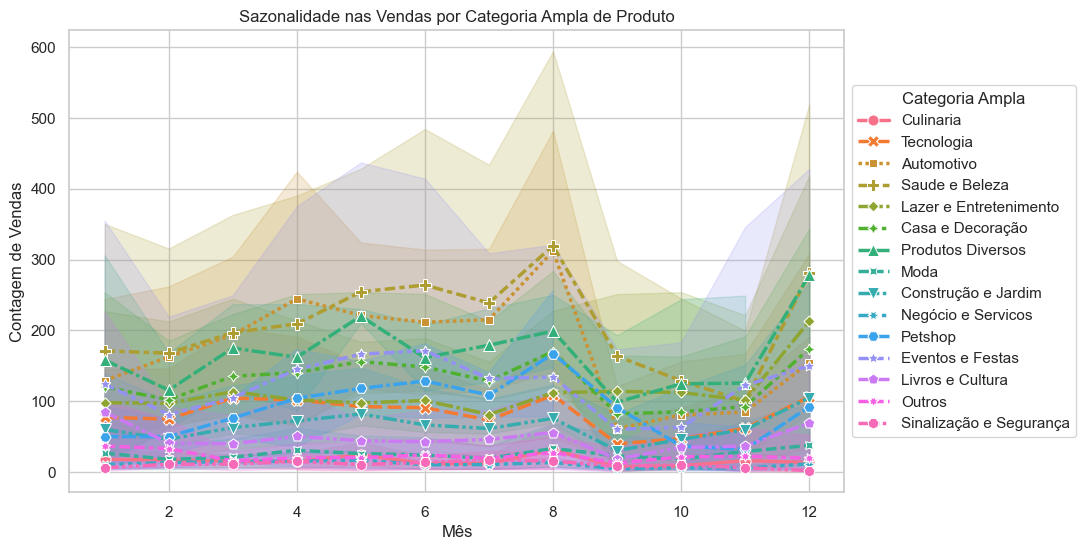

In [58]:
# Ajuste a figura para acomodar a legenda à direita do gráfico
plt.figure(figsize=(10, 6))

# Plote o gráfico de linha com linhas mais espaçadas e marcadores visíveis
sns.lineplot(x='month', y='count', hue='categoria_ampla', data=sazonalidade, linewidth=2.5, style='categoria_ampla', markers=True, markersize=8)

# Adicione a legenda à direita do gráfico
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Categoria Ampla')

plt.title('Sazonalidade nas Vendas por Categoria Ampla de Produto')
plt.xlabel('Mês')
plt.ylabel('Contagem de Vendas')
plt.show()

In [59]:
#Totais absolutos de vendas por categoria ampla

# Agrupe os order_id por categoria_ampla e calcule os totais
contagem_categorias = df_orders.groupby('categoria_ampla')['order_id'].count().reset_index()
contagem_categorias.columns = ['categoria_ampla', 'total_vendas']

# Ordene o DataFrame pelos totais de vendas em ordem decrescente
contagem_categorias = contagem_categorias.sort_values(by='total_vendas', ascending=False)

print(contagem_categorias)


            categoria_ampla  total_vendas
1          Casa e Decoração          8635
5    Lazer e Entretenimento          4597
14               Tecnologia          4377
12           Saude e Beleza          4123
0                Automotivo          1830
2       Construção e Jardim          1585
4          Eventos e Festas          1390
6          Livros e Cultura          1172
7                      Moda          1169
11        Produtos Diversos           761
10                  Petshop           701
9                    Outros           412
3                 Culinaria           279
8        Negócio e Servicos           265
13  Sinalização e Segurança            90


C:\Users\Vini\AppData\Local\Temp\ipykernel_10660\2334876916.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='categoria_ampla', y='total_vendas', data=contagem_categorias, marker='o', hue='categoria_ampla', palette='Set2', markers=True, ci=None, markersize=20)


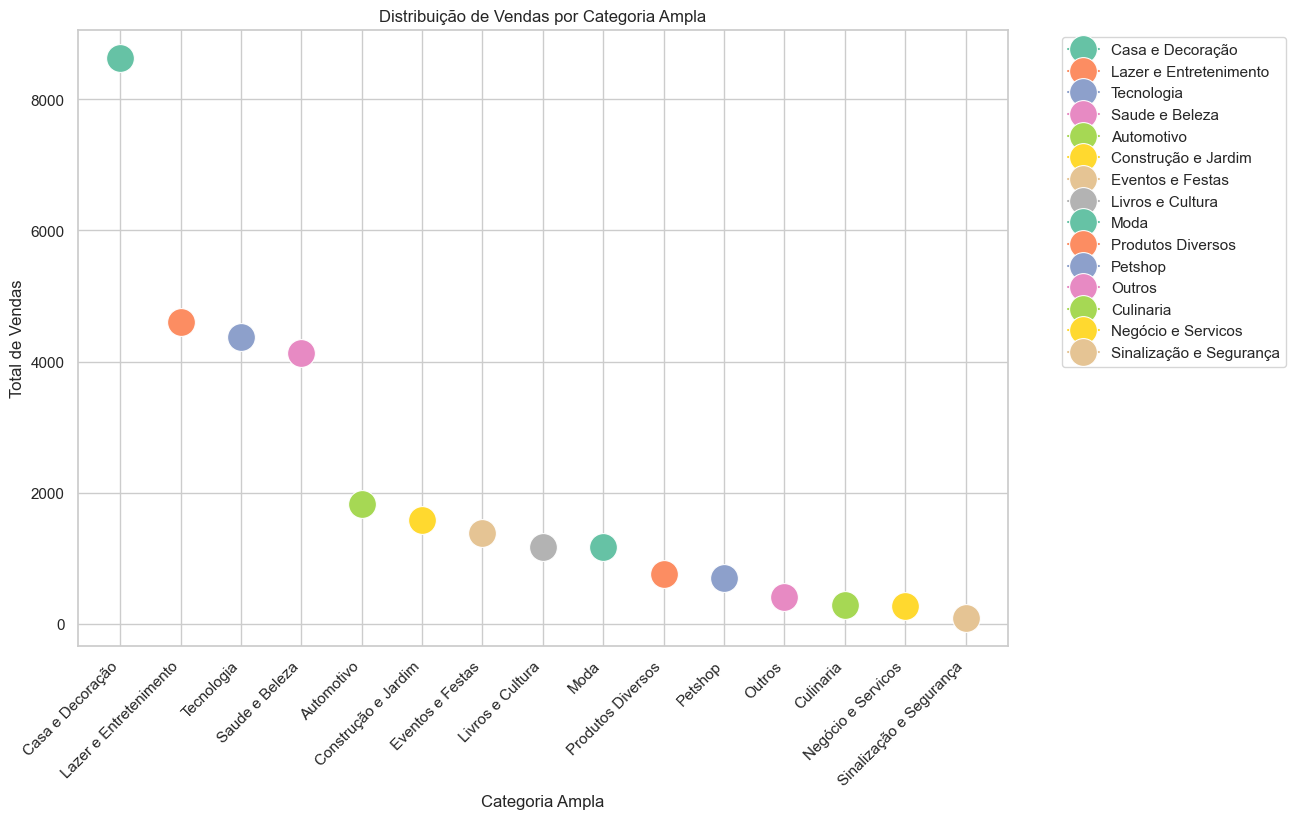

In [60]:
# Defina o estilo do gráfico
sns.set(style="whitegrid")

# Crie um gráfico de linha com cores diferentes para cada categoria e aumente o tamanho dos marcadores
plt.figure(figsize=(12, 8))
sns.lineplot(x='categoria_ampla', y='total_vendas', data=contagem_categorias, marker='o', hue='categoria_ampla', palette='Set2', markers=True, ci=None, markersize=20)

# Adicione rótulos e título
plt.xlabel('Categoria Ampla')
plt.ylabel('Total de Vendas')
plt.title('Distribuição de Vendas por Categoria Ampla')

# Rotacione os rótulos no eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Ajuste a legenda para ficar fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Exiba o gráfico
plt.show()

In [61]:
# Esse código traz as 5 categorias com maior volume de avaliações com nota máxima.

# Etapa 1: Combine as tabelas df_orders e df_reviews usando a coluna order_id
merged_data = pd.merge(df_orders, df_reviews, on='order_id', how='left')

# Etapa 2: Filtre as avaliações com nota 5
avaliacoes_nota_5 = merged_data[merged_data['review_score'] == 5]

# Etapa 3: Agrupe por categoria_ampla e conte a quantidade de avaliações para cada categoria
contagem_avaliacoes_por_categoria = avaliacoes_nota_5.groupby('categoria_ampla').size().reset_index(name='count')

# Etapa 4: Ordene as categorias pelo número de avaliações em ordem decrescente
contagem_avaliacoes_por_categoria = contagem_avaliacoes_por_categoria.sort_values(by='count', ascending=False)

# Etapa 5: Selecione as top 5 categorias
top5_categorias = contagem_avaliacoes_por_categoria.head(5)

print(top5_categorias)

           categoria_ampla  count
1         Casa e Decoração   5166
5   Lazer e Entretenimento   2744
14              Tecnologia   2593
12          Saude e Beleza   2446
0               Automotivo   1087


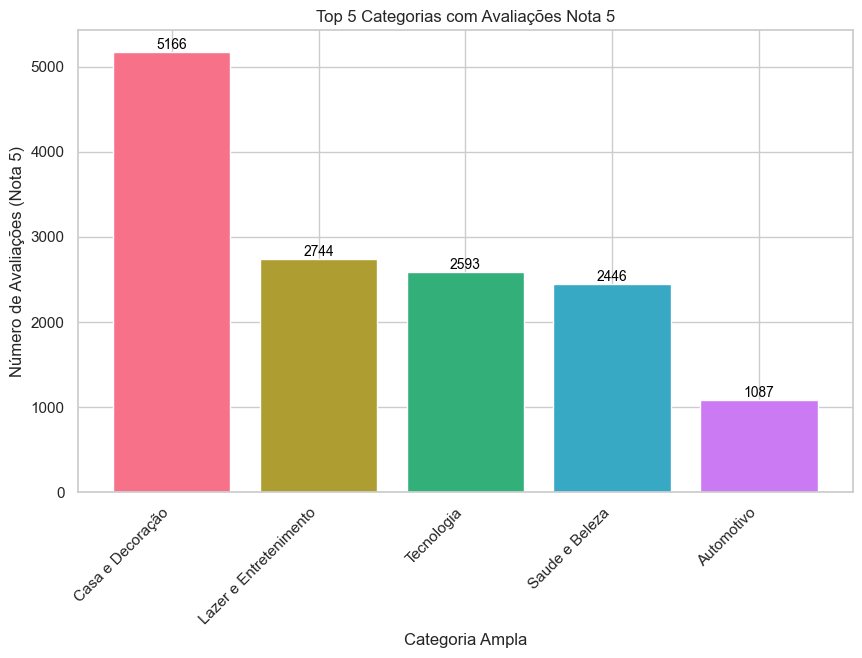

In [62]:
# Utilize uma paleta de cores diferente para cada barra
cores = sns.color_palette('husl', n_colors=len(top5_categorias))

# Crie um gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(top5_categorias['categoria_ampla'], top5_categorias['count'], color=cores)

# Adicione rótulos e título
plt.xlabel('Categoria Ampla')
plt.ylabel('Número de Avaliações (Nota 5)')
plt.title('Top 5 Categorias com Avaliações Nota 5')

# Adicione rótulos nas barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
             ha='center', va='bottom', color='black', fontsize=10)

# Rotacione os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Exiba o gráfico
plt.show()

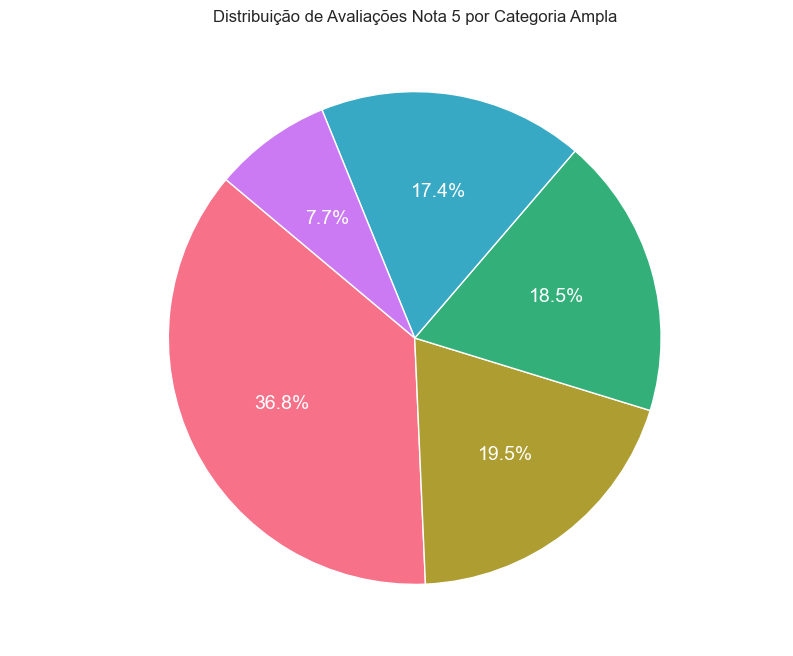

In [63]:
# Utilize uma paleta de cores diferente para cada categoria
cores = sns.color_palette('husl', n_colors=len(top5_categorias))

# Crie um gráfico de pizza
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    top5_categorias['count'],
    labels=top5_categorias['categoria_ampla'],
    autopct='%1.1f%%',
    startangle=140,
    colors=cores,
    textprops=dict(color="w", size=14),  # Ajuste o tamanho dos textos dentro das fatias
)

# Adicione título
plt.title('Distribuição de Avaliações Nota 5 por Categoria Ampla')

# Exiba o gráfico
plt.show()

In [64]:
# Como eventos externos afetam o comportamento de compra?

# Essa é uma das perguntas que sugiro que seja respondida, porém para buscar essa informação, é necessário pegar
# pontos de aumento ou queda das vendas e buscar externamente (com pesquisas externas), o que pode justificar esse movimento.
# Se acharem relevante, com os conteúdos já trazidos em códigos anteriores, essa pergunta pode ser respondida.